In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, f_regression
from sklearn.metrics import accuracy_score, log_loss
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import GradientBoostingRegressor

In [134]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/sample_submission.csv')


In [130]:
train_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
test_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [131]:
def fill_null(data):
  for i in data:
    if data[i].dtype == object:
      mode = data[i].mode()
      data[i].fillna(mode[0], inplace = True)
    else:
      mode = data[i].mode()
      data[i].fillna(mode[0], inplace = True)
  return data
train_data = fill_null(train_data)
test_data = fill_null(test_data)

In [132]:
x_input = train_data
x1_input = test_data

In [133]:
# prepare input data
oe = OrdinalEncoder()
def prepare_inputs(X_train, X_test):
  for i in X_train:
    if X_train[i].dtype == object:
      t1 = np.array(X_train[i])
      t1 = t1.reshape(-1,1)
      oe.fit(t1)
      t2 = oe.transform(t1)
      t2= t2.reshape(-1)
      x_input[i] = t2
  for i in X_test:
    if X_test[i].dtype == object:
      t1 = np.array(X_test[i])
      t1 = t1.reshape(-1,1)
      oe.fit(t1)
      t2 = oe.transform(t1)
      t2= t2.reshape(-1)
      x1_input[i] = t2
prepare_inputs(x_input,x1_input)

In [16]:
#temp = pd.DataFrame()
#['OverallCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','ExterQual','ExterCond','BsmtFinType1','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','GarageQual','GarageCond','EnclosedPorch','3SsnPorch','ScreenPorch','YrSold','YearBuilt','MoSold','Condition1','Condition2',,,,,,,]
#['OverallQual','OverallCond']+['Exterior1st','Exterior2nd']+ ['BsmtFinType1','BsmtFinType2'] + ['TotalBsmtSF','BsmtUnfSF'] + ['BedroomAbvGr','TotRmsAbvGrd']
#['1stFlrSF','2ndFlrSF'] + ['FullBath','HalfBath']

In [135]:
x_input['TotalFlrSF'] = (x_input['1stFlrSF']+x_input['2ndFlrSF'])
x1_input['TotalFlrSF'] = (x1_input['1stFlrSF']+x1_input['2ndFlrSF'])
x_input['TotalBath1'] = (x_input['FullBath']+x_input['HalfBath'])
x1_input['TotalBath1'] = (x1_input['FullBath']+x1_input['HalfBath'])
all_clm = ['1stFlrSF','2ndFlrSF'] + ['FullBath','HalfBath']
x_input = x_input.drop(all_clm,axis = 1)
x1_input = x1_input.drop(all_clm,axis = 1)

In [136]:
x_input['TotalFlrSF_new'] = (x_input['TotalFlrSF']+x_input['GrLivArea'])
x1_input['TotalFlrSF_new'] = (x1_input['TotalFlrSF']+x1_input['GrLivArea'])
x_input = x_input.drop(['TotalFlrSF', 'GrLivArea'],axis = 1)
x1_input = x1_input.drop(['TotalFlrSF', 'GrLivArea'],axis = 1)

In [137]:
#'GarageCars','GarageArea'
x_input['Garage'] = (x_input['GarageCars']*x_input['GarageArea'])
x1_input['Garage'] = (x1_input['GarageCars']*x1_input['GarageArea'])
x_input = x_input.drop(['GarageCars', 'GarageArea'],axis = 1)
x1_input = x1_input.drop(['GarageCars', 'GarageArea'],axis = 1)

In [138]:
#'TotalBath1', 'TotRmsAbvGrd','TotalFlrSF_new'
x_input['TotalSize'] = (x_input['TotalBath1']*x_input['TotRmsAbvGrd']*x_input['TotalFlrSF_new'])
x1_input['TotalSize'] = (x1_input['TotalBath1']*x1_input['TotRmsAbvGrd']*x1_input['TotalFlrSF_new'])
x_input = x_input.drop(['TotalBath1', 'TotRmsAbvGrd','TotalFlrSF_new'],axis = 1)
x1_input = x1_input.drop(['TotalBath1', 'TotRmsAbvGrd','TotalFlrSF_new'],axis = 1)

In [164]:
#'OverallQual', 'Garage',
x_input['OverallGarage'] = (x_input['OverallQual']*x_input['Garage'])
x1_input['OverallGarage'] = (x1_input['OverallQual']*x1_input['Garage'])
x_input = x_input.drop(['OverallQual', 'Garage'],axis = 1)
x1_input = x1_input.drop(['OverallQual', 'Garage'],axis = 1)

In [180]:
#(x_input['OverallGarage']+x_input['TotalSize']+x_input['TotalBsmtSF'])
x_input['OverallGarage'] = (x_input['OverallGarage']+x_input['TotalSize']+x_input['TotalBsmtSF'])
x1_input['OverallGarage'] = (x1_input['OverallGarage']+x1_input['TotalSize']+x1_input['TotalBsmtSF'])
x_input = x_input.drop(['TotalSize', 'TotalBsmtSF'],axis = 1)
x1_input = x1_input.drop(['TotalSize', 'TotalBsmtSF'],axis = 1)

In [220]:
#(x_input['YearRemodAdd']+x_input['GarageYrBlt']+x_input['Foundation'])
x_input['Year'] = (x_input['YearRemodAdd']+x_input['GarageYrBlt']+x_input['Foundation'])
x1_input['Year'] = (x_input['YearRemodAdd']+x_input['GarageYrBlt']+x_input['Foundation'])
x_input = x_input.drop(['YearRemodAdd', 'GarageYrBlt', 'Foundation'],axis = 1)
x1_input = x1_input.drop(['YearRemodAdd', 'GarageYrBlt', 'Foundation'],axis = 1)

In [139]:
all_clm1 = ['OverallCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','ExterQual','ExterCond','BsmtFinType1','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','GarageQual','GarageCond','EnclosedPorch','3SsnPorch','ScreenPorch','YrSold','YearBuilt','MoSold','Condition1','Condition2']
x_input = x_input.drop(all_clm1,axis = 1)
x1_input = x1_input.drop(all_clm1,axis = 1)

In [140]:
print(x_input.shape,' ',x1_input.shape)

(1460, 48)   (1459, 47)


In [ ]:
# feature selection
def select_features(X, Y, func):
  bestfeatures = SelectKBest(score_func=func, k='all')
  fit = bestfeatures.fit(X,Y)
	#fs = SelectKBest(score_func=func, k='all')
	#fs.fit(X_train, y_train)
	#X_train_fs = fs.transform(X_train)
	#X_test_fs = fs.transform(X_test)
	#return X_train_fs, X_test_fs, fs
  return fit

# feature selection
#X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2)
fit = select_features(x_input, x_input['SalePrice'], mutual_info_regression)
#fit = select_features(x_input1, y_input, chi2)
#fit = select_features(x_input1, y_input, f_regression)
# what are scores for the features
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_input.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(15,'Score'))
#for i in range(len(fit.scores_)):
	#print('Feature %d: %f' % (x_input1.loc[i], fs.scores_[i]))
# plot the scores
#pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
#pyplot.show()

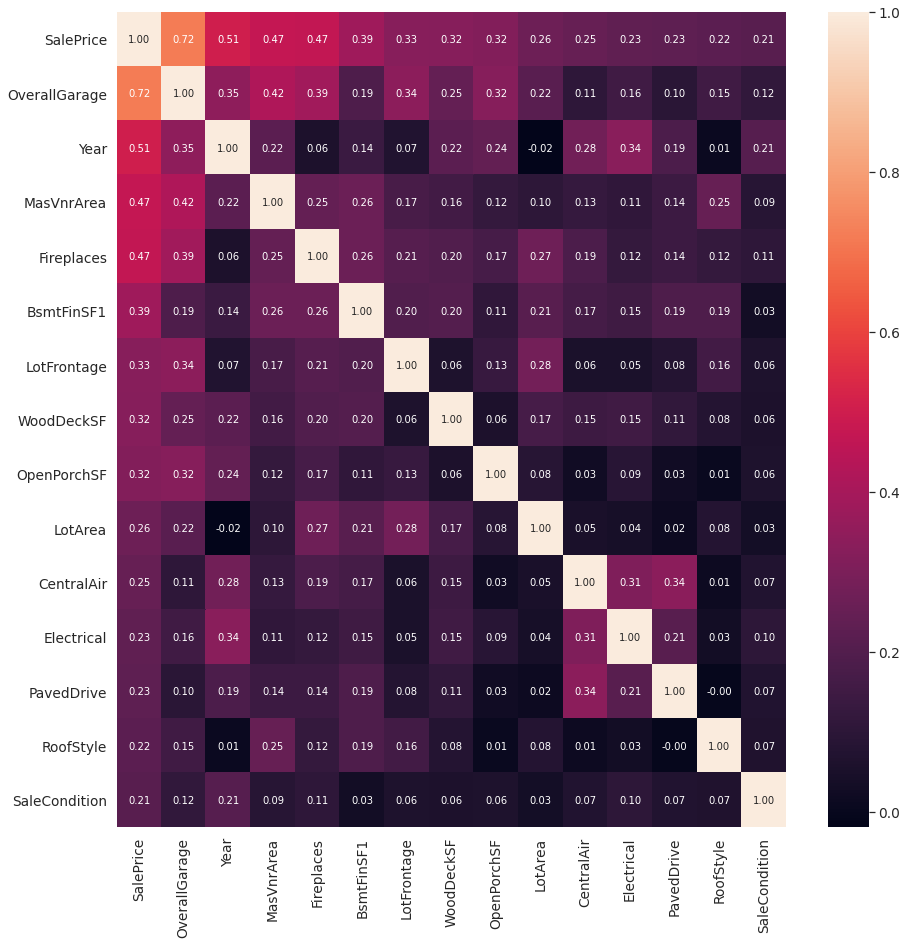

In [221]:
f,ax = plt.subplots(figsize=(15, 15))
corrmat = x_input.corr()
k =15
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(x_input[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [182]:
cols 

Index(['SalePrice', 'OverallGarage', 'YearRemodAdd', 'MasVnrArea',
       'Fireplaces', 'GarageYrBlt', 'BsmtFinSF1', 'Foundation', 'LotFrontage',
       'WoodDeckSF', 'OpenPorchSF', 'LotArea', 'CentralAir', 'Electrical',
       'PavedDrive'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


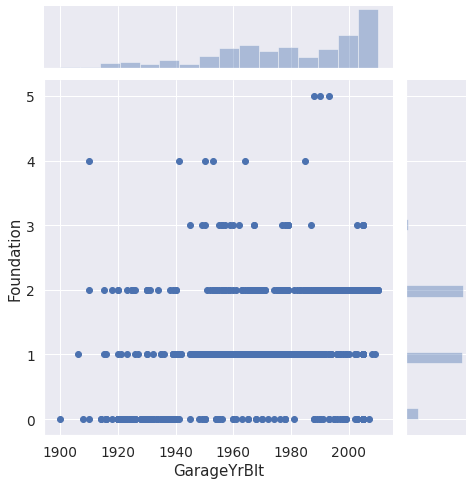

In [185]:
g = sns.jointplot(x_input['GarageYrBlt'], x_input['Foundation'], kind="scatter", size=7)
#plt.savefig('graph.png')
plt.show()

In [222]:
y = x_input['SalePrice']
train = x_input.drop(['SalePrice'],axis = 1)

In [223]:
min_max_scaler = preprocessing.MinMaxScaler()
train = min_max_scaler.fit_transform(train)
test = min_max_scaler.fit_transform(x1_input)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=1)

In [225]:
regressorTree = DecisionTreeRegressor(criterion='mse', splitter='best',random_state = 0)  
regressorTree.fit(X_train, y_train) 
res = regressorTree.score(X_train, y_train)
print(res*100)
y_pred_tree = regressorTree.predict(X_test)
DTRrmse = (mean_squared_error(y_test, y_pred_tree))**0.5
DTRrmse
# 34 features
#99.99891791227729
#34154.51272228431

# 25 features
99.99891791227729
38059.715640624905

99.99951360528686


38059.715640624905

In [226]:
regressorGB = GradientBoostingRegressor(
    max_depth=70,
    n_estimators=1000,
    learning_rate=1.0,
    criterion='mse',
)
regressorGB.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressorGB.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)
res = regressorGB.score(X_train, y_train)
print(res*100)
y_predGB = regressorGB.predict(X_test)
GBrmse = (mean_squared_error(y_test, y_predGB))**0.5
GBrmse

#98.32619386202857
#32894.028208323754

# 25 features
98.00636885118014
33610.8385170461

99.99951360528686


33610.8385170461

In [227]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
res = regressor.score(X_train, y_train)
print(res*100)
y_pred = regressor.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a**0.5
rmse
# 34 features
#81.11211900041317
#32908.83108668875

# 25 features
80.0038442074204
32692.370436137197

76.73495929815037


32692.370436137197

In [237]:
passref = PassiveAggressiveRegressor(max_iter=1000000,tol=.0001,early_stopping=False,n_iter_no_change=1000,shuffle=True,)
passref.fit(X_train, y_train)
res = passref.score(X_train, y_train)
print(res*100)
y_pred = passref.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a**0.5
rmse

72.61792382439442


32729.93722306512

In [96]:
pred_y = passref.predict(test)
pred_y = pred_y.reshape(-1)
all_id = np.array(test_dataY['Id'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['Id', 'SalePrice'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/passref.csv", index=False)

Testing


In [ ]:
all_clm = ['LotArea','LotFrontage'] + ['OverallQual','OverallCond'] + ['Exterior1st','Exterior2nd'] + ['BsmtQual','BsmtCond'] + ['BsmtFinType1','BsmtFinType2'] + ['ExterQual','ExterCond'] + ['BsmtFinSF1','BsmtFinSF2'] + ['TotalBsmtSF','BsmtUnfSF'] + ['1stFlrSF','2ndFlrSF'] + ['BsmtFullBath','BsmtHalfBath'] + ['FullBath','HalfBath'] + ['BedroomAbvGr','TotRmsAbvGrd'] + ['GarageQual','GarageCond'] + ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'] + ['YrSold','YearBuilt','MoSold'] + ['Condition1','Condition2']

In [218]:
t1 = (x_input['YearRemodAdd']+x_input['GarageYrBlt']+x_input['Foundation'])
#t1 = ((x_input['YrSold'] - x_input['YearBuilt'])*365)+(x_input['MoSold']*30)

In [ ]:
temp.loc[x_input['Exterior1st'] == x_input['Exterior2nd'],'TotalExterior'] = 1
temp.loc[x_input['Exterior1st'] != x_input['Exterior2nd'],'TotalExterior'] = 2

In [ ]:
temp['TotalRoom'] = (x_input['BedroomAbvGr']+x_input['TotRmsAbvGrd'])

In [219]:
#'YearRemodAdd', 'GarageYrBlt', 'Foundation'
correlation = t1.corr(x_input['SalePrice'])
correlation

0.5061293628426851

In [174]:
print(x_input['Exterior1st'].describe(),' ',train_data['Exterior2nd'].describe())
#print(train_data['LotArea'],' ',train_data['LotFrontage'])

count    1460.000000
mean        9.624658
std         3.197659
min         0.000000
25%         8.000000
50%        12.000000
75%        12.000000
max        14.000000
Name: Exterior1st, dtype: float64   count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object


In [ ]:
train_data['Exterior2nd']

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Shng
4       VinylSd
         ...   
1455    VinylSd
1456    Plywood
1457    CmentBd
1458    MetalSd
1459    HdBoard
Name: Exterior2nd, Length: 1460, dtype: object

In [ ]:
temp

OverallCondition  TotalExterior  TotalFinArea  CompleteBsmtSF
0                  6.0            2.0           7.0             706
1                  7.0            1.0           5.0             978
2                  6.0            2.0           7.0             486
3                  6.0            2.0           5.0             216
4                  6.5            2.0           7.0             655
...                ...            ...           ...             ...
1455               5.5            2.0          10.0               0
1456               6.0            2.0           4.0             953
1457               8.0            1.0           7.0             275
1458               5.5            1.0           6.0            1078
1459               5.5            1.0           4.0            1120

[1460 rows x 4 columns]